### Author: Akshay Ijantkar
### Team: Aqua Wizards
### Project: Surfers Bible

In [1]:
# !pip install --user pygeocoder
# !pip install --user geopandas
# !pip install --user geopy
# !pip install  googlemaps
# !pip install weather-au
# !pip install pyowm

# Import Libraries:

In [31]:
import pandas as pd
import numpy as np
import random
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns; sns.set()
from scipy.stats import norm 
import matplotlib.pyplot as plt
# For Linear regression
from sklearn.linear_model import LinearRegression
# For split given dataset into train and test set.
from sklearn.model_selection import train_test_split
# To verify models using this metrics 
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# v
from matplotlib import rcParams
rcParams['figure.figsize'] = 50,50
import pandas_profiling
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from pandas import ExcelWriter
from pandas import ExcelFile

from pygeocoder import Geocoder

import sys
from weather_au import api
from weather_au import summary
from weather import place, observations, uv_index
import time

import json
import requests
from datetime import datetime, timedelta
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

import catboost as ctb
from catboost import CatBoostRegressor, FeaturesData, Pool
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

import re

%matplotlib inline

# Load CSV clean addresses with Coordinates CSV as Dataframe:

In [3]:
dataset_path = r"D:\Monash_University_Stuff\Final_Semester\IE\Surfers_Bible_Code_Commit\Datasets\\"
join_shark_weather_df = pd.read_csv(dataset_path + "join_shark_weather_agg_checkpoint.csv")
# raw_shark_df = pd.read_excel(dataset_path + "shark_file_geolocation_checkpoint.xlsx")
print("join_shark_weather_df.shape = ", join_shark_weather_df.shape)

join_shark_weather_df.head(5)

join_shark_weather_df.shape =  (714, 78)


,Case_Date,Date_Location,lat,lng,place_id,postal_code,location_type,Address,Area,Location,Name,Age,Gender,Type,Activity,Time,Species,Injury,Fatal (Y/N),temperature_max,temperature_min,temperature_mean,temperature_median,temperature_std,temperature_var,temperature_sem,apparentTemperature_max,apparentTemperature_min,apparentTemperature_mean,apparentTemperature_median,apparentTemperature_std,apparentTemperature_var,apparentTemperature_sem,dewPoint_max,dewPoint_min,dewPoint_mean,dewPoint_median,dewPoint_std,dewPoint_var,dewPoint_sem,humidity_max,humidity_min,humidity_mean,humidity_median,humidity_std,humidity_var,humidity_sem,windSpeed_max,windSpeed_min,windSpeed_mean,windSpeed_median,windSpeed_std,windSpeed_var,windSpeed_sem,windBearing_max,windBearing_min,windBearing_mean,windBearing_median,windBearing_std,windBearing_var,windBearing_sem,uvIndex_max,uvIndex_min,uvIndex_mean,uvIndex_median,uvIndex_std,uvIndex_var,uvIndex_sem,cloudCover_max,cloudCover_min,cloudCover_mean,cloudCover_median,cloudCover_std,cloudCover_var,cloudCover_sem,month,month_day,season
0,2020.01.17,2020.01.17_-34.534_150.875,-34.534,150.875,NaN,NaN,APPROXIMATE,Windang Beach New South Wales AUSTRALIA,New South Wales,Windang Beach,Will Schroeter,59,M,Unprovoked,Surfing,08h00,"""A small shark""",Laceration ot left ankle and foot,N,74.23,67.33,70.733333,70.650,1.834779,3.366414,0.264828,74.89,67.98,71.574167,71.590,1.839734,3.384621,0.265543,68.02,64.21,66.464583,66.760,1.139290,1.297983,0.164442,0.92,0.75,0.866250,0.890,0.049578,0.002458,0.007156,15.69,11.38,13.747500,14.070,1.118545,1.251143,0.161448,196.0,163.0,181.000000,180.5,10.268730,105.446809,1.482163,5.0,0.0,1.750000,0.0,2.128829,4.531915,0.307270,1.00,1.00,1.000000,1.000,0.000000,0.000000,0.000000,1.0,4.0,summer
1,2020.01.07,2020.01.07_-23.295_151.708,-23.295,151.708,ChIJE1RBGQxA6GsR0Vxvqw9Ilvk,4805,APPROXIMATE,North West Island Queensland AUSTRALIA,Queensland,North West Island,Miah Holmes,7,F,Unprovoked,Swimming,17h30,Lemon shark,Lacerations to leg,N,80.87,76.92,79.013750,79.090,1.359921,1.849386,0.196288,84.33,78.08,81.243750,81.910,2.375001,5.640628,0.342802,71.01,68.23,70.035417,70.060,0.650806,0.423549,0.093936,0.80,0.69,0.741250,0.735,0.038183,0.001458,0.005511,16.20,12.60,14.284167,14.470,0.986957,0.974084,0.142455,95.0,69.0,87.166667,91.0,9.182160,84.312057,1.325331,9.0,0.0,2.458333,0.0,3.376756,11.402482,0.487393,0.95,0.39,0.618750,0.545,0.167873,0.028181,0.024230,1.0,1.0,summer
2,2020.01.05,2020.01.05_-33.922_121.903,-33.922,121.903,NaN,NaN,APPROXIMATE,Cull Island / Esperance Western Australia AUST...,Western Australia,Cull Island / Esperance,Gary Johnson,57,M,Unprovoked,Scuba diving,13h00,White shark,FATAL,Y,77.99,57.98,69.743333,72.135,7.516800,56.502278,1.084957,77.99,57.98,69.743333,72.135,7.516800,56.502278,1.084957,53.71,49.44,50.939583,50.345,1.317381,1.735493,0.190148,0.75,0.37,0.530000,0.480,0.132793,0.017634,0.019167,21.18,9.38,14.727083,13.760,3.395318,11.528183,0.490072,100.0,34.0,63.708333,58.5,23.587734,556.381206,3.404596,13.0,0.0,3.458333,0.0,4.649220,21.615248,0.671057,0.06,0.00,0.012500,0.000,0.017073,0.000291,0.002464,1.0,6.0,summer
3,2020.01.02,2020.01.02_-33.861_121.891,-33.861,121.891,ChIJuycfmldHWyoR0At6JDj2AAU,6450,APPROXIMATE,Esperance Western Australia AUSTRALIA,Western Australia,Esperance,Eric Birighitti,21,M,Questionable,Swimming after being swept off rocks,16h10,NaN,Probable drowning and scavenging,Y,76.26,65.08,70.057500,69.365,3.854755,14.859134,0.556386,76.87,65.08,70.373333,69.565,3.962809,15.703852,0.571982,66.27,58.16,62.220208,62.130,2.124828,4.514896,0.306693,0.89,0.63,0.765417,0.755,0.067634,0.004574,0.009762,19.65,5.26,14.557917,15.230,3.805035,14.478293,0.549210,230.0,126.0,186.000000,206.0,42.110796,1773.319149,6.078170,13.0,0.0,3.375000,0.0,4.517696,20.409574,0.652073,0.13,0.00,0.053333,0.055,0.041531,0.001725,0.005994,1.0,3.0,summer
4,2019.12.30,2019.12.30_-23.295_151.708,-23.295,151.708,ChIJE1RBGQxA6GsR0Vxvqw9Ilvk,4805,APPROXIMATE,North West Island Qu

In [4]:
join_shark_weather_df["Fatal (Y/N)"].unique()

array(['N', 'Y', nan, 'F'], dtype=object)

In [5]:
join_shark_weather_df["Fatal (Y/N)"] = join_shark_weather_df["Fatal (Y/N)"].str.replace("F", "Y")
join_shark_weather_df["Fatal (Y/N)"].unique()

array(['N', 'Y', nan], dtype=object)

In [6]:
join_shark_weather_df.isnull().sum()

Case_Date                       0
Date_Location                   0
lat                             0
lng                             0
place_id                      203
postal_code                   203
location_type                   0
Address                         0
Area                            0
Location                        0
Name                            8
Age                           226
Gender                        706
Type                            1
Activity                       53
Time                          280
Species                       203
Injury                          4
Fatal (Y/N)                     7
temperature_max                 0
temperature_min                 0
temperature_mean                0
temperature_median              0
temperature_std                 0
temperature_var                 0
temperature_sem                 0
apparentTemperature_max         0
apparentTemperature_min         0
apparentTemperature_mean        0
apparentTemper

In [7]:
join_shark_weather_df.dropna(subset =["Fatal (Y/N)"], 
                             inplace = True)

join_shark_weather_df.reset_index(inplace = True)
join_shark_weather_df.shape

(707, 79)

## Descriptive Statistics of DF:

In [9]:
join_shark_weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,707.0,356.527581,205.977378,0.000000,179.500000,356.000000,534.500000,713.000000
lat,707.0,-30.213195,7.793044,-43.652000,-34.045500,-32.052000,-28.002000,44.954000
lng,707.0,142.068126,20.574329,-105.870000,138.517000,150.813000,152.727000,159.082000
temperature_max,707.0,76.958961,10.044065,29.220000,70.115000,77.100000,83.740000,110.400000
temperature_min,707.0,62.302476,9.920869,22.120000,55.625000,63.050000,69.650000,91.020000
temperature_mean,707.0,69.284170,9.099308,26.542917,63.412174,69.761429,75.652292,94.540000
temperature_median,707.0,69.061859,9.260931,27.370000,62.717500,69.745000,75.517500,98.720000
temperature_std,707.0,5.382168,2.955481,0.000000,3.309387,4.985362,6.863369,18.232770
temperature_var,707.0,37.690502,42.579587,0.000000,10.952045,24.853839,47.105833,332.433914
temperature_sem,707.0,1.710423,1.346501,0.000000,0.862232,1.370840,2.079437,12.415000


## Save Dataframe for ML App:

In [90]:
dataset_path = "D:\Monash_University_Stuff\Final_Semester\IE\Surfers_Bible_Code_Commit\Datasets\\"
join_shark_weather_df.to_csv(dataset_path + "for_ml_join_shark_weather_df.csv", 
                             index = False)

## Numeric and Categorical Features:

In [12]:
numeric_features_lst = ['temperature_max',
 'temperature_min',
 'temperature_mean',
 'temperature_median',
 'temperature_std',
 'temperature_var',
 'temperature_sem',
 'apparentTemperature_max',
 'apparentTemperature_min',
 'apparentTemperature_mean',
 'apparentTemperature_median',
 'apparentTemperature_std',
 'apparentTemperature_var',
 'apparentTemperature_sem',
 'dewPoint_max',
 'dewPoint_min',
 'dewPoint_mean',
 'dewPoint_median',
 'dewPoint_std',
 'dewPoint_var',
 'dewPoint_sem',
 'humidity_max',
 'humidity_min',
 'humidity_mean',
 'humidity_median',
 'humidity_std',
 'humidity_var',
 'humidity_sem',
 'windSpeed_max',
 'windSpeed_min',
 'windSpeed_mean',
 'windSpeed_median',
 'windSpeed_std',
 'windSpeed_var',
 'windSpeed_sem',
 'windBearing_max',
 'windBearing_min',
 'windBearing_mean',
 'windBearing_median',
 'windBearing_std',
 'windBearing_var',
 'windBearing_sem',
 'uvIndex_max',
 'uvIndex_min',
 'uvIndex_mean',
 'uvIndex_median',
 'uvIndex_std',
 'uvIndex_var',
 'uvIndex_sem',
 'cloudCover_max',
 'cloudCover_min',
 'cloudCover_mean',
 'cloudCover_median',
 'cloudCover_std',
 'cloudCover_var',
 'cloudCover_sem',
 'lat','lng'
]
cat_features_lst = [
 'month',
 'month_day',
 'season']

In [13]:
for cat_feat in cat_features_lst:
    join_shark_weather_df[cat_feat] = join_shark_weather_df[cat_feat].astype(str)
join_shark_weather_df[cat_features_lst].info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   month      707 non-null    object
 1   month_day  707 non-null    object
 2   season     707 non-null    object
dtypes: object(3)
memory usage: 16.7+ KB


In [14]:
join_shark_weather_df[join_shark_weather_df["Fatal (Y/N)"] == "Y"].shape

(117, 79)

In [15]:
join_shark_weather_df[join_shark_weather_df["Fatal (Y/N)"] == "N"].shape

(590, 79)

In [16]:
def convert_target_ref_format_func(target):
    if target =="Y":
        return 1.0
    elif target == "N":
        return 0.0
    
join_shark_weather_df['Target_Fatal'] = join_shark_weather_df['Fatal (Y/N)'].apply(convert_target_ref_format_func)

In [17]:
X = join_shark_weather_df[numeric_features_lst+cat_features_lst]
y = join_shark_weather_df['Target_Fatal']

In [18]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]
categorical_features_indices

array([58, 59, 60], dtype=int64)

## Random Search CatBoost CV:

In [20]:
%%time 
# Wall time: 1h 10min 29s
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'Accuracy', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 100
         }

model = CatBoostClassifier(**params)
search_spaces = {'depth'                     : sp_randInt(4, 10),
              'learning_rate'                : sp_randFloat(0.0001, 0.9),
              'iterations'                   : sp_randInt(1000, 3000),
              'l2_leaf_reg'                  : sp_randInt(1, 5),
              'bagging_temperature'          : uniform(0, 1),
              'random_strength'              : sp_randInt(1, 20)
             }

randm = RandomizedSearchCV(estimator = model, 
                           param_distributions = search_spaces, 
                           cv = 7, 
                           n_iter = 20, 
                           n_jobs=-1)
randm.fit(X, y, cat_features = categorical_features_indices)

# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    

print("\n The best estimator across ALL searched params:\n",
      randm.best_estimator_)

print("\n The best score across ALL searched params:\n",
      randm.best_score_)

print("\n The best parameters across ALL searched params:\n",
      randm.best_params_)

print("\n =====================================================")

0:	learn: 0.8401697	total: 104ms	remaining: 2m 1s
200:	learn: 1.0000000	total: 7.19s	remaining: 34.4s
400:	learn: 1.0000000	total: 13.6s	remaining: 25.9s
600:	learn: 1.0000000	total: 20.1s	remaining: 18.7s
800:	learn: 1.0000000	total: 26.5s	remaining: 12s
1000:	learn: 1.0000000	total: 33.1s	remaining: 5.32s
1161:	learn: 1.0000000	total: 38.1s	remaining: 0us

 Results from Random Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.0

 The best parameters across ALL searched params:
 {'bagging_temperature': 0.4315518374559244, 'depth': 6, 'iterations': 1162, 'l2_leaf_reg': 3, 'learning_rate': 0.863633321785339, 'random_strength': 4}

Wall time: 1h 14min 30s


{'bagging_temperature': 0.4315518374559244,
 'depth': 6,
 'iterations': 1162,
 'l2_leaf_reg': 3,
 'learning_rate': 0.863633321785339,
 'random_strength': 4}

In [22]:
randm.best_params_

{'bagging_temperature': 0.4315518374559244,
 'depth': 6,
 'iterations': 1162,
 'l2_leaf_reg': 3,
 'learning_rate': 0.863633321785339,
 'random_strength': 4}

## Train Test Split:

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  train_size=0.7, 
                                                  stratify = y,
                                                  random_state=100)

In [24]:
%%time



params = {'loss_function':'Logloss', # objective function
          'eval_metric':'Accuracy', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 100,
          'bagging_temperature': 0.4315518374559244,
         'bagging_temperature': 0.4315518374559244,
         'depth': 6,
         'iterations': 1162,
         'l2_leaf_reg': 3,
         'learning_rate': 0.863633321785339,
         'random_strength': 4
         }
clf = CatBoostClassifier(**params)


clf.fit(X_train, y_train, 
        cat_features = categorical_features_indices, 
        eval_set=(X_val, y_val), 
        verbose=True
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

0:	learn: 0.8340081	test: 0.8356808	best: 0.8356808 (0)	total: 33ms	remaining: 38.3s
1:	learn: 0.8421053	test: 0.8403756	best: 0.8403756 (1)	total: 64.2ms	remaining: 37.2s
2:	learn: 0.8562753	test: 0.8403756	best: 0.8403756 (1)	total: 111ms	remaining: 42.7s
3:	learn: 0.8643725	test: 0.8309859	best: 0.8403756 (1)	total: 146ms	remaining: 42.4s
4:	learn: 0.8724696	test: 0.8215962	best: 0.8403756 (1)	total: 182ms	remaining: 42s
5:	learn: 0.8724696	test: 0.8215962	best: 0.8403756 (1)	total: 183ms	remaining: 35.3s
6:	learn: 0.8866397	test: 0.8169014	best: 0.8403756 (1)	total: 212ms	remaining: 35s
7:	learn: 0.8987854	test: 0.8262911	best: 0.8403756 (1)	total: 251ms	remaining: 36.2s
8:	learn: 0.9149798	test: 0.8028169	best: 0.8403756 (1)	total: 280ms	remaining: 35.9s
9:	learn: 0.9170040	test: 0.7934272	best: 0.8403756 (1)	total: 313ms	remaining: 36.1s
10:	learn: 0.9311741	test: 0.7887324	best: 0.8403756 (1)	total: 341ms	remaining: 35.7s
11:	learn: 0.9372470	test: 0.7934272	best: 0.8403756 (1)	

98:	learn: 1.0000000	test: 0.7887324	best: 0.8403756 (1)	total: 3.6s	remaining: 38.6s
99:	learn: 1.0000000	test: 0.7887324	best: 0.8403756 (1)	total: 3.63s	remaining: 38.5s
100:	learn: 1.0000000	test: 0.7793427	best: 0.8403756 (1)	total: 3.66s	remaining: 38.5s
101:	learn: 1.0000000	test: 0.7840376	best: 0.8403756 (1)	total: 3.7s	remaining: 38.5s
102:	learn: 1.0000000	test: 0.7840376	best: 0.8403756 (1)	total: 3.73s	remaining: 38.3s
103:	learn: 1.0000000	test: 0.7840376	best: 0.8403756 (1)	total: 3.77s	remaining: 38.3s
104:	learn: 1.0000000	test: 0.7840376	best: 0.8403756 (1)	total: 3.8s	remaining: 38.3s
105:	learn: 1.0000000	test: 0.7840376	best: 0.8403756 (1)	total: 3.83s	remaining: 38.2s
106:	learn: 1.0000000	test: 0.7934272	best: 0.8403756 (1)	total: 3.87s	remaining: 38.1s
107:	learn: 1.0000000	test: 0.7934272	best: 0.8403756 (1)	total: 3.92s	remaining: 38.2s
108:	learn: 1.0000000	test: 0.7887324	best: 0.8403756 (1)	total: 3.95s	remaining: 38.1s
109:	learn: 1.0000000	test: 0.7934272

195:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 6.89s	remaining: 33.9s
196:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 6.92s	remaining: 33.9s
197:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 6.96s	remaining: 33.9s
198:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 6.99s	remaining: 33.8s
199:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 7.02s	remaining: 33.8s
200:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 7.06s	remaining: 33.7s
201:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 7.09s	remaining: 33.7s
202:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 7.12s	remaining: 33.6s
203:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 7.16s	remaining: 33.6s
204:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 7.19s	remaining: 33.6s
205:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 7.22s	remaining: 33.5s
206:	learn: 1.0000000	test: 0.80

294:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 10.2s	remaining: 30.1s
295:	learn: 1.0000000	test: 0.7981221	best: 0.8403756 (1)	total: 10.3s	remaining: 30s
296:	learn: 1.0000000	test: 0.7981221	best: 0.8403756 (1)	total: 10.3s	remaining: 30s
297:	learn: 1.0000000	test: 0.7981221	best: 0.8403756 (1)	total: 10.3s	remaining: 30s
298:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 10.4s	remaining: 29.9s
299:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 10.4s	remaining: 29.9s
300:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 10.4s	remaining: 29.9s
301:	learn: 1.0000000	test: 0.8028169	best: 0.8403756 (1)	total: 10.5s	remaining: 29.9s
302:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 10.5s	remaining: 29.8s
303:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 10.6s	remaining: 29.8s
304:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 10.6s	remaining: 29.8s
305:	learn: 1.0000000	test: 0.8075117	

392:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 13.7s	remaining: 26.8s
393:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 13.7s	remaining: 26.7s
394:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 13.7s	remaining: 26.7s
395:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 13.8s	remaining: 26.7s
396:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 13.8s	remaining: 26.6s
397:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 13.9s	remaining: 26.6s
398:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 13.9s	remaining: 26.6s
399:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 13.9s	remaining: 26.6s
400:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 14s	remaining: 26.5s
401:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 14s	remaining: 26.5s
402:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 14.1s	remaining: 26.5s
403:	learn: 1.0000000	test: 0.807511

490:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 17s	remaining: 23.3s
491:	learn: 1.0000000	test: 0.8075117	best: 0.8403756 (1)	total: 17.1s	remaining: 23.2s
492:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 17.1s	remaining: 23.2s
493:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 17.1s	remaining: 23.2s
494:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 17.2s	remaining: 23.1s
495:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 17.2s	remaining: 23.1s
496:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 17.2s	remaining: 23.1s
497:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 17.3s	remaining: 23s
498:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 17.3s	remaining: 23s
499:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 17.3s	remaining: 22.9s
500:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 17.4s	remaining: 22.9s
501:	learn: 1.0000000	test: 0.8122066	

586:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 20.7s	remaining: 20.3s
587:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 20.7s	remaining: 20.2s
588:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 20.8s	remaining: 20.2s
589:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 20.8s	remaining: 20.2s
590:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 20.8s	remaining: 20.1s
591:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 20.9s	remaining: 20.1s
592:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 20.9s	remaining: 20s
593:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 20.9s	remaining: 20s
594:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 20.9s	remaining: 20s
595:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 21s	remaining: 19.9s
596:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 21s	remaining: 19.9s
597:	learn: 1.0000000	test: 0.8122066	best

686:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24s	remaining: 16.6s
687:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.1s	remaining: 16.6s
688:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.1s	remaining: 16.5s
689:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.1s	remaining: 16.5s
690:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.2s	remaining: 16.5s
691:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.2s	remaining: 16.4s
692:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.2s	remaining: 16.4s
693:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.3s	remaining: 16.4s
694:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.3s	remaining: 16.3s
695:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.3s	remaining: 16.3s
696:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 24.4s	remaining: 16.2s
697:	learn: 1.0000000	test: 0.8122

784:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.4s	remaining: 13.1s
785:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.4s	remaining: 13.1s
786:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.4s	remaining: 13.1s
787:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.5s	remaining: 13s
788:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.5s	remaining: 13s
789:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.5s	remaining: 13s
790:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.6s	remaining: 12.9s
791:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.6s	remaining: 12.9s
792:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.6s	remaining: 12.9s
793:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.7s	remaining: 12.8s
794:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 27.7s	remaining: 12.8s
795:	learn: 1.0000000	test: 0.8122066	

879:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 30.7s	remaining: 9.83s
880:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 30.7s	remaining: 9.79s
881:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 30.7s	remaining: 9.76s
882:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 30.8s	remaining: 9.72s
883:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 30.8s	remaining: 9.69s
884:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 30.9s	remaining: 9.66s
885:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 30.9s	remaining: 9.62s
886:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 30.9s	remaining: 9.59s
887:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 31s	remaining: 9.55s
888:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 31s	remaining: 9.52s
889:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 31s	remaining: 9.48s
890:	learn: 1.0000000	test: 0.8122066	

978:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.1s	remaining: 6.37s
979:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.1s	remaining: 6.33s
980:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.1s	remaining: 6.29s
981:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.2s	remaining: 6.26s
982:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.2s	remaining: 6.22s
983:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.2s	remaining: 6.19s
984:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.3s	remaining: 6.16s
985:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.3s	remaining: 6.12s
986:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.3s	remaining: 6.08s
987:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.4s	remaining: 6.05s
988:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 34.4s	remaining: 6.02s
989:	learn: 1.0000000	test: 0.81

1072:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.2s	remaining: 3.09s
1073:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.2s	remaining: 3.05s
1074:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.3s	remaining: 3.02s
1075:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.3s	remaining: 2.98s
1076:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.4s	remaining: 2.95s
1077:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.4s	remaining: 2.91s
1078:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.4s	remaining: 2.88s
1079:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.5s	remaining: 2.85s
1080:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.5s	remaining: 2.81s
1081:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.5s	remaining: 2.77s
1082:	learn: 1.0000000	test: 0.8122066	best: 0.8403756 (1)	total: 37.6s	remaining: 2.74s
1083:	learn: 1.000000

## K fold Cross validation on Best:


In [32]:
%%time 
# Wall time: Wall time: 6min 27s
num_fold = 10
catboost_estimator = CatBoostClassifier(
                        depth =  randm.best_params_['depth'],
                        iterations =  randm.best_params_['iterations'],
                        l2_leaf_reg =  randm.best_params_['l2_leaf_reg'],
                        learning_rate =  randm.best_params_['learning_rate'],
                        bagging_temperature =  randm.best_params_['bagging_temperature'],
                        random_strength = randm.best_params_['random_strength'],
                        cat_features = categorical_features_indices,
                        loss_function='Logloss', # objective function
                        eval_metric = 'Accuracy', # metric
                        verbose=200, # output to stdout info about training process every 200 iterations
                        random_seed= 100
                        )

kfold = KFold(n_splits = num_fold)

catboost_random_search_results = cross_validate(catboost_estimator, 
                            X, y, 
                            cv = kfold,
                            scoring = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall'])
# print("Baseline =  %.2f (%.2f) MSE" % (results_1.mean(), results_1.std()))
catboost_random_search_results

0:	learn: 0.8238994	total: 38.1ms	remaining: 44.2s
200:	learn: 1.0000000	total: 6.97s	remaining: 33.3s
400:	learn: 1.0000000	total: 13.8s	remaining: 26.1s
600:	learn: 1.0000000	total: 20.5s	remaining: 19.2s
800:	learn: 1.0000000	total: 27.1s	remaining: 12.2s
1000:	learn: 1.0000000	total: 33.8s	remaining: 5.44s
1161:	learn: 1.0000000	total: 39.4s	remaining: 0us
0:	learn: 0.8238994	total: 41.9ms	remaining: 48.7s
200:	learn: 1.0000000	total: 8.09s	remaining: 38.7s
400:	learn: 1.0000000	total: 14.5s	remaining: 27.6s
600:	learn: 1.0000000	total: 20.9s	remaining: 19.5s
800:	learn: 1.0000000	total: 27.1s	remaining: 12.2s
1000:	learn: 1.0000000	total: 33.4s	remaining: 5.37s
1161:	learn: 1.0000000	total: 38.4s	remaining: 0us
0:	learn: 0.8364780	total: 39.5ms	remaining: 45.9s
200:	learn: 1.0000000	total: 6.92s	remaining: 33.1s
400:	learn: 1.0000000	total: 13.7s	remaining: 26s
600:	learn: 1.0000000	total: 20.6s	remaining: 19.2s
800:	learn: 1.0000000	total: 27.5s	remaining: 12.4s
1000:	learn: 1.00

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0:	learn: 0.8238994	total: 32.6ms	remaining: 37.9s
200:	learn: 1.0000000	total: 6.95s	remaining: 33.2s
400:	learn: 1.0000000	total: 13.7s	remaining: 26s
600:	learn: 1.0000000	total: 20.5s	remaining: 19.2s
800:	learn: 1.0000000	total: 27.2s	remaining: 12.2s
1000:	learn: 1.0000000	total: 34s	remaining: 5.46s
1161:	learn: 1.0000000	total: 38.9s	remaining: 0us
0:	learn: 0.8286164	total: 41.9ms	remaining: 48.6s
200:	learn: 1.0000000	total: 7.2s	remaining: 34.4s
400:	learn: 1.0000000	total: 14s	remaining: 26.6s
600:	learn: 1.0000000	total: 20.4s	remaining: 19.1s
800:	learn: 1.0000000	total: 27s	remaining: 12.2s
1000:	learn: 1.0000000	total: 33.2s	remaining: 5.34s
1161:	learn: 1.0000000	total: 38.3s	remaining: 0us
0:	learn: 0.8380503	total: 40.5ms	remaining: 47s
200:	learn: 1.0000000	total: 7.64s	remaining: 36.5s
400:	learn: 1.0000000	total: 14.3s	remaining: 27.1s
600:	learn: 1.0000000	total: 21.1s	remaining: 19.7s
800:	learn: 1.0000000	total: 27.9s	remaining: 12.6s
1000:	learn: 1.0000000	tot

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0:	learn: 0.8351648	total: 7.25ms	remaining: 8.42s
200:	learn: 1.0000000	total: 7.32s	remaining: 35s
400:	learn: 1.0000000	total: 14.5s	remaining: 27.4s
600:	learn: 1.0000000	total: 20.7s	remaining: 19.3s
800:	learn: 1.0000000	total: 26.7s	remaining: 12s
1000:	learn: 1.0000000	total: 32.2s	remaining: 5.17s
1161:	learn: 1.0000000	total: 36.6s	remaining: 0us
0:	learn: 0.8320251	total: 7.37ms	remaining: 8.56s
200:	learn: 1.0000000	total: 5.88s	remaining: 28.1s
400:	learn: 1.0000000	total: 13.1s	remaining: 24.8s
600:	learn: 1.0000000	total: 18.9s	remaining: 17.6s
800:	learn: 1.0000000	total: 24.8s	remaining: 11.2s
1000:	learn: 1.0000000	total: 30.6s	remaining: 4.92s
1161:	learn: 1.0000000	total: 35.2s	remaining: 0us
0:	learn: 0.8540031	total: 6.63ms	remaining: 7.7s
200:	learn: 1.0000000	total: 5.91s	remaining: 28.3s
400:	learn: 1.0000000	total: 11.7s	remaining: 22.2s
600:	learn: 1.0000000	total: 17.4s	remaining: 16.2s
800:	learn: 1.0000000	total: 23s	remaining: 10.4s
1000:	learn: 1.0000000

{'fit_time': array([39.99306202, 38.93065643, 40.10389185, 39.45996571, 38.84758449,
        40.09337473, 43.03483725, 37.03817677, 35.61074352, 34.14118457]),
 'score_time': array([0.03845429, 0.02947569, 0.03400135, 0.02936006, 0.03408718,
        0.0327642 , 0.02880049, 0.02094364, 0.02991939, 0.03091788]),
 'test_accuracy': array([0.90140845, 0.91549296, 0.81690141, 0.88732394, 0.84507042,
        0.77464789, 0.70422535, 0.78571429, 0.84285714, 0.64285714]),
 'test_roc_auc': array([0.5969697 , 0.5       , 0.5795756 , 0.53030303, 0.44047619,
        0.48308271, 0.41714286, 0.56896552, 0.59083333, 0.51403986]),
 'test_f1': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.11764706, 0.15384615, 0.07407407]),
 'test_precision': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2       , 0.33333333, 0.33333333]),
 'test_recall': array([0.        , 0.        , 0.        , 0.        , 0. 

## 10 FOLD Cross Validation Descriptive Statistics:

In [45]:
cross_validate_results = catboost_random_search_results 
print("cross_validate_results ['test_roc_auc'] - R2 Stats:>> \nMean = %.4f|STD = %.4f |Min = %.4f |Max = %.4f" % (
    cross_validate_results['test_roc_auc'].mean(), cross_validate_results['test_roc_auc'].std(),
    cross_validate_results['test_roc_auc'].min(), cross_validate_results['test_roc_auc'].max()))
print(" ")
print("cross_validate_results ['fit_time'] - R2 Stats:>> \nMean = %.4f|STD = %.4f |Min = %.4f |Max = %.4f" % (
    cross_validate_results['fit_time'].mean(), cross_validate_results['fit_time'].std(),
    cross_validate_results['fit_time'].min(), cross_validate_results['fit_time'].max()))
print(" ")
print("cross_validate_results ['score_time'] - R2 Stats:>> \nMean = %.4f|STD = %.4f |Min = %.4f |Max = %.4f" % (
    cross_validate_results['score_time'].mean(), cross_validate_results['score_time'].std(),
    cross_validate_results['score_time'].min(), cross_validate_results['score_time'].max()))
print(" ")
print("cross_validate_results ['test_accuracy'] - R2 Stats:>> \nMean = %.4f|STD = %.4f |Min = %.4f |Max = %.4f" % (
    cross_validate_results['test_accuracy'].mean(), cross_validate_results['test_accuracy'].std(),
    cross_validate_results['test_accuracy'].min(), cross_validate_results['test_accuracy'].max()))
print(" ")

cross_validate_results

cross_validate_results ['test_roc_auc'] - R2 Stats:>> 
Mean = 0.5221|STD = 0.0597 |Min = 0.4171 |Max = 0.5970
 
cross_validate_results ['fit_time'] - R2 Stats:>> 
Mean = 38.7253|STD = 2.4106 |Min = 34.1412 |Max = 43.0348
 
cross_validate_results ['score_time'] - R2 Stats:>> 
Mean = 0.0309|STD = 0.0043 |Min = 0.0209 |Max = 0.0385
 
cross_validate_results ['test_accuracy'] - R2 Stats:>> 
Mean = 0.8116|STD = 0.0829 |Min = 0.6429 |Max = 0.9155
 


{'fit_time': array([39.99306202, 38.93065643, 40.10389185, 39.45996571, 38.84758449,
        40.09337473, 43.03483725, 37.03817677, 35.61074352, 34.14118457]),
 'score_time': array([0.03845429, 0.02947569, 0.03400135, 0.02936006, 0.03408718,
        0.0327642 , 0.02880049, 0.02094364, 0.02991939, 0.03091788]),
 'test_accuracy': array([0.90140845, 0.91549296, 0.81690141, 0.88732394, 0.84507042,
        0.77464789, 0.70422535, 0.78571429, 0.84285714, 0.64285714]),
 'test_roc_auc': array([0.5969697 , 0.5       , 0.5795756 , 0.53030303, 0.44047619,
        0.48308271, 0.41714286, 0.56896552, 0.59083333, 0.51403986]),
 'test_f1': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.11764706, 0.15384615, 0.07407407]),
 'test_precision': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2       , 0.33333333, 0.33333333]),
 'test_recall': array([0.        , 0.        , 0.        , 0.        , 0. 

## 10 Fold Test test_roc_auc plot:

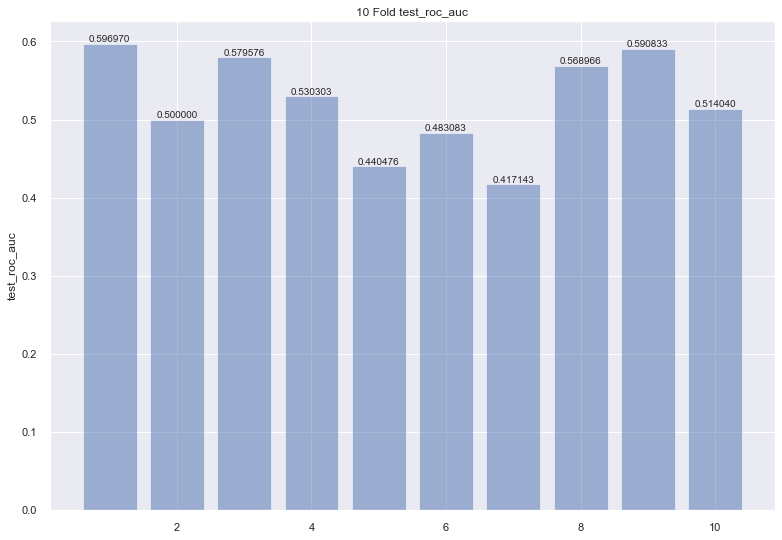

In [49]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(13, 9))
# plt.figure(figsize=(10, 10))
rects1 = plt.bar([1,2,3,4,5,6,7,8,9,10],
        catboost_random_search_results['test_roc_auc'], 
        align='center', 
        alpha=0.5)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 
                1.*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

# plt.xticks(y_pos, objects)
plt.ylabel('test_roc_auc')
plt.title('10 Fold test_roc_auc')
plt.show()

## 10 Fold Test fit_time plot:

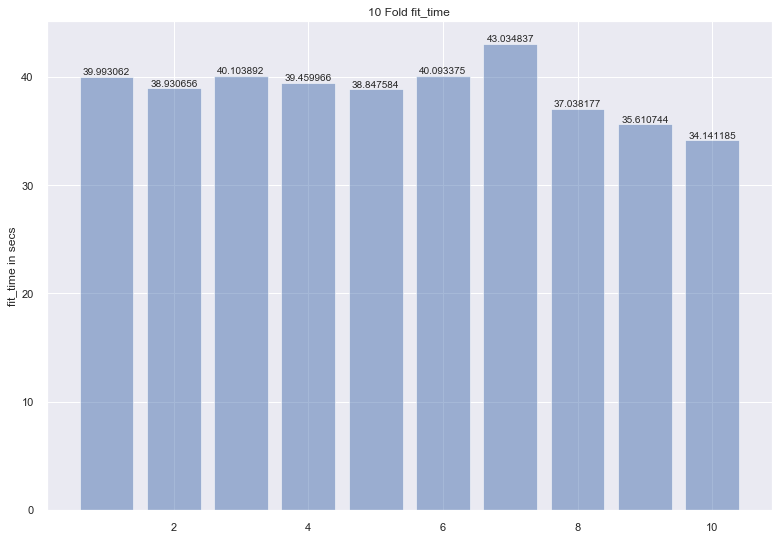

In [50]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(13, 9))
# plt.figure(figsize=(10, 10))
rects1 = plt.bar([1,2,3,4,5,6,7,8,9,10],
        catboost_random_search_results['fit_time'], 
        align='center', 
        alpha=0.5)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 
                1.*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

# plt.xticks(y_pos, objects)
plt.ylabel('fit_time in secs')
plt.title('10 Fold fit_time')
plt.show()

## 10 Fold Test score_time plot:

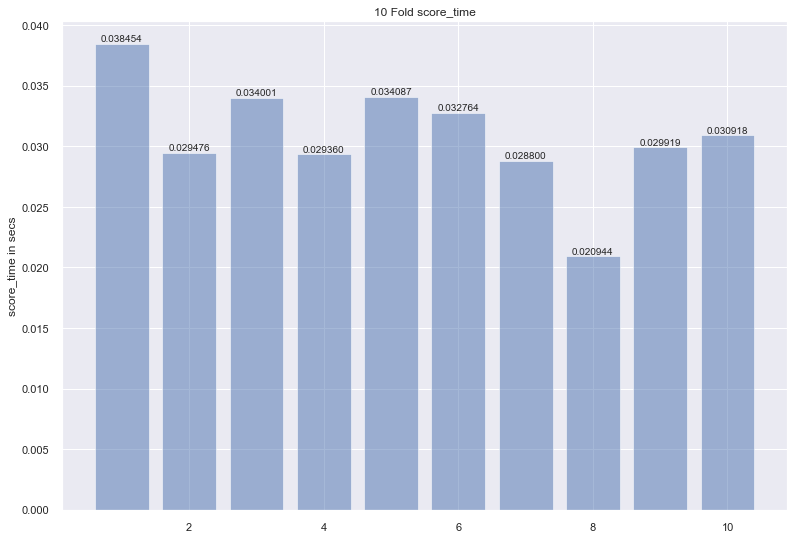

In [51]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(13, 9))
# plt.figure(figsize=(10, 10))
rects1 = plt.bar([1,2,3,4,5,6,7,8,9,10],
        catboost_random_search_results['score_time'], 
        align='center', 
        alpha=0.5)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 
                1.*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

# plt.xticks(y_pos, objects)
plt.ylabel('score_time in secs')
plt.title('10 Fold score_time')
plt.show()

## 10 Fold Test Accuracy plot:

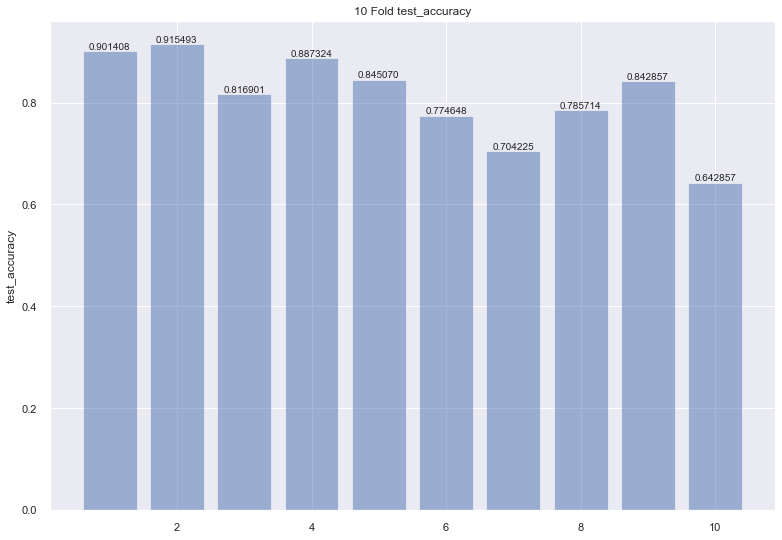

In [52]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(13, 9))
# plt.figure(figsize=(10, 10))
rects1 = plt.bar([1,2,3,4,5,6,7,8,9,10],
        catboost_random_search_results['test_accuracy'], 
        align='center', 
        alpha=0.5)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 
                1.*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

# plt.xticks(y_pos, objects)
plt.ylabel('test_accuracy')
plt.title('10 Fold test_accuracy')
plt.show()

## MODEL Save, Load and Predict:

In [56]:
clf.save_model('catboost_model_rand_search_84_5', format="cbm")

In [57]:
model.load_model('catboost_model_rand_search_84_5')

In [66]:
model.predict(X_val)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
model.predict(X_val[:1])

array([0.])

In [86]:
model.predict_proba(X_val)

array([[0.89520647, 0.10479353],
       [0.83216746, 0.16783254],
       [0.77845229, 0.22154771],
       [0.70684914, 0.29315086],
       [0.80420808, 0.19579192],
       [0.86605397, 0.13394603],
       [0.83216746, 0.16783254],
       [0.82077944, 0.17922056],
       [0.93072392, 0.06927608],
       [0.80046455, 0.19953545],
       [0.88682519, 0.11317481],
       [0.77845229, 0.22154771],
       [0.8241323 , 0.1758677 ],
       [0.83100982, 0.16899018],
       [0.89588405, 0.10411595],
       [0.80420808, 0.19579192],
       [0.89639235, 0.10360765],
       [0.80315198, 0.19684802],
       [0.80089723, 0.19910277],
       [0.77525291, 0.22474709],
       [0.74429409, 0.25570591],
       [0.83216746, 0.16783254],
       [0.78699297, 0.21300703],
       [0.74429409, 0.25570591],
       [0.753735  , 0.246265  ],
       [0.79516382, 0.20483618],
       [0.83216746, 0.16783254],
       [0.80420808, 0.19579192],
       [0.90285556, 0.09714444],
       [0.89557411, 0.10442589],
       [0.

In [65]:
model.predict_proba(X_val[:1])

array([[0.89520647, 0.10479353]])

In [74]:
model.predict_proba(X_val[:1])

array([[0.89520647, 0.10479353]])

In [82]:
model.predict_proba(X_val[:1])

array([[0.89520647, 0.10479353]])

## SHARK ATTACK PROBABILITY:

In [84]:
model.predict_proba(X_val[:1]).flatten()[1]

0.1047935304859657

In [89]:
for p in model.predict_proba(X):
    print(p[1])


0.12375404074048212
0.12114238054846055
0.03964617731531086
0.12303002270467955
0.13721413745911468
0.12530216951251436
0.14313987365963665
0.12303002270467955
0.12114238054846055
0.09714443675607928
0.1036076462060001
0.14313987365963665
0.03964617731531086
0.13721413745911468
0.03306778934108023
0.23445757323975946
0.1036076462060001
0.17817744696800955
0.0868496472209168
0.12114238054846055
0.12530216951251436
0.10411595039017497
0.03964617731531086
0.12530216951251436
0.03306778934108023
0.12530216951251436
0.03306778934108023
0.039901817556737634
0.13394602985301315
0.12114238054846055
0.0868496472209168
0.10411595039017497
0.04746976285343791
0.12114238054846055
0.0868496472209168
0.10298764075853722
0.12114238054846055
0.2130070310868862
0.16899017635616492
0.2130070310868862
0.2462649963438806
0.2557059084902861
0.2557059084902861
0.12530216951251436
0.0868496472209168
0.13125861127282729
0.09714443675607928
0.10298764075853722
0.09714443675607928
0.22619059296291735
0.15501963

In [92]:
join_shark_weather_df

,index,Case_Date,Date_Location,lat,lng,place_id,postal_code,location_type,Address,Area,Location,Name,Age,Gender,Type,Activity,Time,Species,Injury,Fatal (Y/N),temperature_max,temperature_min,temperature_mean,temperature_median,temperature_std,temperature_var,temperature_sem,apparentTemperature_max,apparentTemperature_min,apparentTemperature_mean,apparentTemperature_median,apparentTemperature_std,apparentTemperature_var,apparentTemperature_sem,dewPoint_max,dewPoint_min,dewPoint_mean,dewPoint_median,dewPoint_std,dewPoint_var,dewPoint_sem,humidity_max,humidity_min,humidity_mean,humidity_median,humidity_std,humidity_var,humidity_sem,windSpeed_max,windSpeed_min,windSpeed_mean,windSpeed_median,windSpeed_std,windSpeed_var,windSpeed_sem,windBearing_max,windBearing_min,windBearing_mean,windBearing_median,windBearing_std,windBearing_var,windBearing_sem,uvIndex_max,uvIndex_min,uvIndex_mean,uvIndex_median,uvIndex_std,uvIndex_var,uvIndex_sem,cloudCover_max,cloudCover_min,cloudCover_mean,cloudCover_median,cloudCover_std,cloudCover_var,cloudCover_sem,month,month_day,season,Target_Fatal
0,0,2020.01.17,2020.01.17_-34.534_150.875,-34.534,150.875,NaN,NaN,APPROXIMATE,Windang Beach New South Wales AUSTRALIA,New South Wales,Windang Beach,Will Schroeter,59,M,Unprovoked,Surfing,08h00,"""A small shark""",Laceration ot left ankle and foot,N,74.2300,67.3300,70.733333,70.65000,1.834779,3.366414,0.264828,74.8900,67.9800,71.574167,71.59000,1.839734,3.384621,0.265543,68.0200,64.2100,66.464583,66.76000,1.139290,1.297983,0.164442,0.9200,0.7500,0.866250,0.89000,0.049578,0.002458,0.007156,15.6900,11.3800,13.747500,14.07000,1.118545,1.251143,0.161448,196.00,163.00,181.000000,180.500,10.268730,105.446809,1.482163,5.0,0.0,1.750000,0.0,2.128829,4.531915,0.307270,1.0000,1.0000,1.000000,1.00000,0.000000,0.000000,0.000000,1.0,4.0,summer,0.0
1,1,2020.01.07,2020.01.07_-23.295_151.708,-23.295,151.708,ChIJE1RBGQxA6GsR0Vxvqw9Ilvk,4805,APPROXIMATE,North West Island Queensland AUSTRALIA,Queensland,North West Island,Miah Holmes,7,F,Unprovoked,Swimming,17h30,Lemon shark,Lacerations to leg,N,80.8700,76.9200,79.013750,79.09000,1.359921,1.849386,0.196288,84.3300,78.0800,81.243750,81.91000,2.375001,5.640628,0.342802,71.0100,68.2300,70.035417,70.06000,0.650806,0.423549,0.093936,0.8000,0.6900,0.741250,0.73500,0.038183,0.001458,0.005511,16.2000,12.6000,14.284167,14.47000,0.986957,0.974084,0.142455,95.00,69.00,87.166667,91.000,9.182160,84.312057,1.325331,9.0,0.0,2.458333,0.0,3.376756,11.402482,0.487393,0.9500,0.3900,0.618750,0.54500,0.167873,0.028181,0.024230,1.0,1.0,summer,0.0
2,2,2020.01.05,2020.01.05_-33.922_121.903,-33.922,121.903,NaN,NaN,APPROXIMATE,Cull Island / Esperance Western Australia AUST...,Western Australia,Cull Island / Esperance,Gary Johnson,57,M,Unprovoked,Scuba diving,13h00,White shark,FATAL,Y,77.9900,57.9800,69.743333,72.13500,7.516800,56.502278,1.084957,77.9900,57.9800,69.743333,72.13500,7.516800,56.502278,1.084957,53.7100,49.4400,50.939583,50.34500,1.317381,1.735493,0.190148,0.7500,0.3700,0.530000,0.48000,0.132793,0.017634,0.019167,21.1800,9.3800,14.727083,13.76000,3.395318,11.528183,0.490072,100.00,34.00,63.708333,58.500,23.587734,556.381206,3.404596,13.0,0.0,3.458333,0.0,4.649220,21.615248,0.671057,0.0600,0.0000,0.012500,0.00000,0.017073,0.000291,0.002464,1.0,6.0,summer,1.0
3,3,2020.01.02,2020.01.02_-33.861_121.891,-33.861,121.891,ChIJuycfmldHWyoR0At6JDj2AAU,6450,APPROXIMATE,Esperance Western Australia AUSTRALIA,Western Australia,Esperance,Eric Birighitti,21,M,Questionable,Swimming after being swept off rocks,16h10,NaN,Probable drowning and scavenging,Y,76.2600,65.0800,70.057500,69.36500,3.854755,14.859134,0.556386,76.8700,65.0800,70.373333,69.56500,3.962809,15.703852,0.571982,66.2700,58.1600,62.220208,62.13000,2.124828,4.514896,0.306693,0.8900,0.6300,0.765417,0.75500,0.067634,0.004574,0.009762,19.6500,5.2600,14.557917,15.23000,3.805035,14.478293,0.549210,230.00,126.00,186.000000,206.000,42.110796,1773.319149,6.078170,13.0,0.0,3.375000,0.0,4.517696,20.409574,0.65